# Support Vector Machine - SVM

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection.

# Linear SVM Classification

think of an SVM classifier as fitting the
widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification

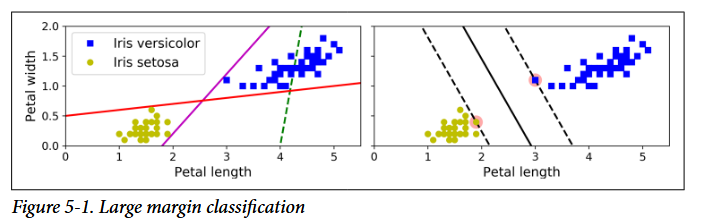

The left plot shows the decision boundaries of three possible linear classifiers. The
model whose decision boundary is represented by the dashed line is so bad that it
does not even separate the classes properly. The other two models work perfectly on
this training set, but their decision boundaries come so close to the instances that
these models will probably not perform as well on new instances. In contrast, the
solid line in the plot on the right represents the decision boundary of an SVM classi‐
fier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. 

### Soft margin classification

A hard margin clasfiication refers to when the datapoints are not included in the street and the object is to create a widest street possible in order to divide the classes clearly. But there are some problems: First, it only works if the data is linearly separable. Second, it is sensitive to
outliers. Figure 5-3 shows the iris dataset with just one additional outlier: on the left,
it is impossible to find a hard margin; on the right, the decision boundary ends up
very different from the one we saw in Figure 5-1 without the outlier, and it will prob‐
ably not generalize as well

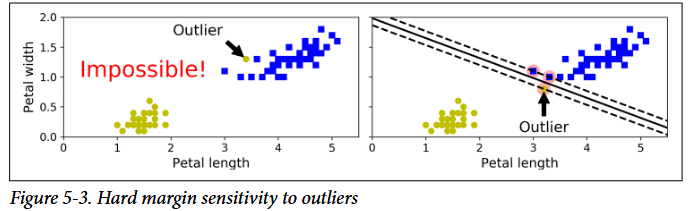

To avoid these issues, use a more flexible model. The objective is to find a good bal‐
ance between keeping the street as large as possible and limiting the margin violations
(i.e., instances that end up in the middle of the street or even on the wrong side). This
is called soft margin classification

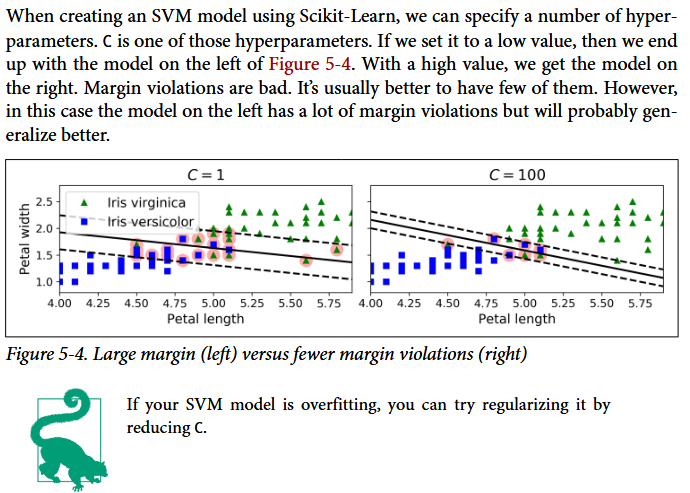

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np

In [3]:
iris = load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

In [5]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss='hinge'))
])

In [6]:
svm_clf.fit(X,y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Instead of using the LinearSVC class, we could use the SVC class with a linear kernel.
When creating the SVC model, we would write SVC(kernel="linear", C=1)

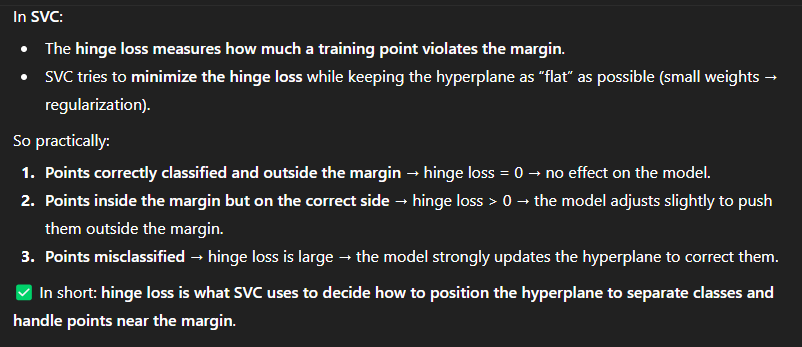

### Non Linear SVM Classification

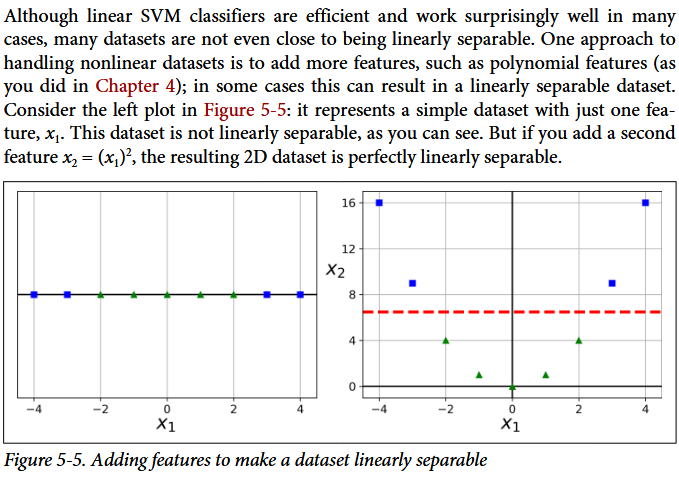

In [10]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [11]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [12]:
polynomial_svm_clf.fit(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


### Polynomial Kernal

A problem with the multiclass classification polynomial technique
<br>
a low polynomial
degree, this method cannot deal with very complex datasets, and with a high polyno‐
mial degree it creates a huge number of features, making the model too slow

A solution is the kernal attribute of SVC and its property of poly

In [13]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


### Similarity Features

one more method to deal with non linear is to apply simlarity function like:

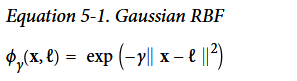

In [14]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'rbf'
,degree,3
,gamma,'scale'


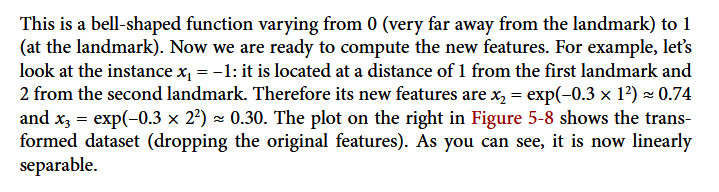

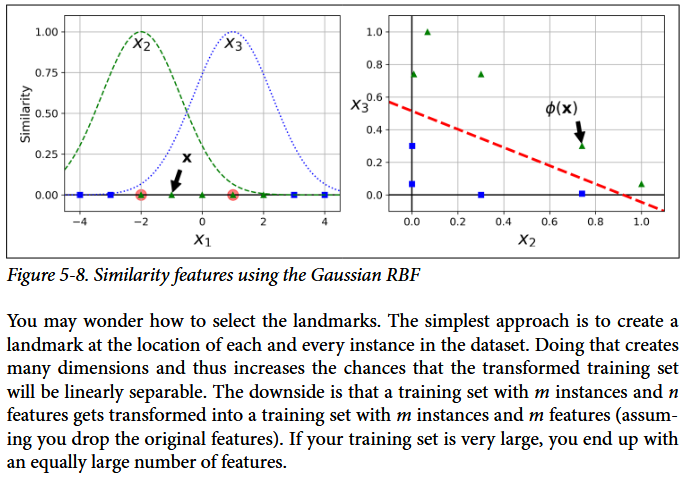